# Opis zbioru danych


1:  surgery?
     1 = Yes, it had surgery
     2 = It was treated without surgery


2:  Age 
     1 = Adult horse
     2 = Young (< 6 months)

3:  Hospital Number 
     - numeric id
     - the case number assigned to the horse (may not be unique if the horse is treated > 1 time)

4:  rectal temperature
     - linear
     - in degrees celsius.
     - An elevated temp may occur due to infection.
     - temperature may be reduced when the animal is in late shock
     - normal temp is 37.8
     - this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

5:  pulse 
     - linear
     - the heart rate in beats per minute
     - is a reflection of the heart condition: 30 -40 is normal for adults
     - rare to have a lower than normal rate although athletic horses may have a rate of 20-25
     - animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

6:  respiratory rate
     - linear
     - normal rate is 8 to 10
     - usefulness is doubtful due to the great fluctuations

7:  temperature of extremities
     - a subjective indication of peripheral circulation
     - possible values:
          1 = Normal
          2 = Warm
          3 = Cool
          4 = Cold
     - cool to cold extremities indicate possible shock
     - hot extremities should correlate with an elevated rectal temp.

8:  peripheral pulse
     - subjective
     - possible values are:
          1 = normal
          2 = increased
          3 = reduced
          4 = absent
     - normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion

9:  mucous membranes
     - a subjective measurement of colour
     - possible values are:
          1 = normal pink
          2 = bright pink
          3 = pale pink
          4 = pale cyanotic
          5 = bright red / injected
          6 = dark cyanotic
     - 1 and 2 probably indicate a normal or slightly increased circulation
     - 3 may occur in early shock
     - 4 and 6 are indicative of serious circulatory compromise
     - 5 is more indicative of a septicemia

10: capillary refill time
     - a clinical judgement. The longer the refill, the poorer the circulation
     - possible values
          1 = < 3 seconds
          2 = >= 3 seconds

11: pain - a subjective judgement of the horse's pain level
     - possible values:
          1 = alert, no pain
          2 = depressed
          3 = intermittent mild pain
          4 = intermittent severe pain
          5 = continuous severe pain
     - should NOT be treated as a ordered or discrete variable!
     - In general, the more painful, the more likely it is to require surgery
     - prior treatment of pain may mask the pain level to some extent

12: peristalsis                              
     - an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
     - possible values:
          1 = hypermotile
          2 = normal
          3 = hypomotile
          4 = absent

13: abdominal distension
     - An IMPORTANT parameter.
     - possible values
          1 = none
          2 = slight
          3 = moderate
          4 = severe
     - an animal with abdominal distension is likely to be painful and have reduced gut motility.
     - a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure

14: nasogastric tube
     - this refers to any gas coming out of the tube
     - possible values:
          1 = none
          2 = slight
          3 = significant
     - a large gas cap in the stomach is likely to give the horse discomfort

15: nasogastric reflux
     - possible values
          1 = none
          2 = > 1 liter
          3 = < 1 liter
     - the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine

16: nasogastric reflux PH
     - linear
     - scale is from 0 to 14 with 7 being neutral
     - normal values are in the 3 to 4 range

17: rectal examination - feces
     - possible values
          1 = normal
          2 = increased
          3 = decreased
          4 = absent
     - absent feces probably indicates an obstruction

18: abdomen
     - possible values
          1 = normal
          2 = other
          3 = firm feces in the large intestine
          4 = distended small intestine
          5 = distended large intestine
     - 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically
     - 4 and 5 indicate a surgical lesion

19: packed cell volume
     - linear
     - the # of red cells by volume in the blood
     - normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

20: total protein
     - linear
     - normal values lie in the 6-7.5 (gms/dL) range
     - the higher the value the greater the dehydration

21: abdominocentesis appearance
     - a needle is put in the horse's abdomen and fluid is obtained from
          the abdominal cavity
     - possible values:
          1 = clear
          2 = cloudy
          3 = serosanguinous
     - normal fluid is clear while cloudy or serosanguinous indicates a compromised gut

22: abdomcentesis total protein
     - linear
     - the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL

23: outcome
     - what eventually happened to the horse?
     - possible values:
          1 = lived
          2 = died
          3 = was euthanized

24: surgical lesion?
     - retrospectively, was the problem (lesion) surgical?
     - all cases are either operated upon or autopsied so that this value and the lesion type are always known
     - possible values:
          1 = Yes
          2 = No

25, 26, 27: type of lesion
     - first number is site of lesion {1 = gastric, 2 = sm intestine, 3 = lg colon, 4 = lg colon and cecum, 5 = cecum, 6 = transverse colon, 7 = retum/descending colon, 8 = uterus, 9 = bladder, 11 = all intestinal sites, 00 = none}
     - second number is type {1 = simple, 2 = strangulation, 3 = inflammation, 4 = other}
     - third number is subtype {1 = mechanical, 2 = paralytic, 0 = n/a}
     - fourth number is specific code

          1 = obturation

          2 = intrinsic

          3 = extrinsic

          4 = adynamic

          5 = volvulus/torsion

          6 = intussuption

          7 = thromboembolic

          8 = hernia

          9 = lipoma/slenic incarceration

          10 = displacement

          0 = n/a

28: cp_data

     - is pathology data present for this case?

          1 = Yes

          2 = No

     - this variable is of no significance since pathology data is not included or collected for these cases

1:  surgery - czy koń przeszedł operację - tak/nie

2:  Age wiek konia młody/dorosły

3:  Hospital Number 

     - numeric id

     - the case number assigned to the horse (may not be unique if the horse is treated > 1 time)


4:  rectal temperature

     - linear

     - in degrees celsius.

     - An elevated temp may occur due to infection.

     - temperature may be reduced when the animal is in late shock

     - normal temp is 37.8

     - this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

5:  pulse 

     - linear

     - the heart rate in beats per minute

     - is a reflection of the heart condition: 30 -40 is normal for adults

     - rare to have a lower than normal rate although athletic horses may have a rate of 20-25

     - animals with painful lesions or suffering from circulatory shock may have an elevated heart rate



6:  respiratory rate

     - linear

     - normal rate is 8 to 10

     - usefulness is doubtful due to the great fluctuations



7:  temperature of extremities

     - a subjective indication of peripheral circulation

     - possible values:

          1 = Normal

          2 = Warm

          3 = Cool

          4 = Cold

     - cool to cold extremities indicate possible shock

     - hot extremities should correlate with an elevated rectal temp.



8:  peripheral pulse

     - subjective

     - possible values are:

          1 = normal

          2 = increased

          3 = reduced

          4 = absent

     - normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion



9:  mucous membranes

     - a subjective measurement of colour

     - possible values are:

          1 = normal pink

          2 = bright pink

          3 = pale pink

          4 = pale cyanotic

          5 = bright red / injected

          6 = dark cyanotic

     - 1 and 2 probably indicate a normal or slightly increased circulation

     - 3 may occur in early shock

     - 4 and 6 are indicative of serious circulatory compromise

     - 5 is more indicative of a septicemia



10: capillary refill time

     - a clinical judgement. The longer the refill, the poorer the circulation

     - possible values

          1 = < 3 seconds

          2 = >= 3 seconds



11: pain - a subjective judgement of the horse's pain level

     - possible values:

          1 = alert, no pain

          2 = depressed

          3 = intermittent mild pain

          4 = intermittent severe pain

          5 = continuous severe pain

     - should NOT be treated as a ordered or discrete variable!

     - In general, the more painful, the more likely it is to require surgery

     - prior treatment of pain may mask the pain level to some extent



12: peristalsis                              

     - an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases

     - possible values:

          1 = hypermotile

          2 = normal

          3 = hypomotile

          4 = absent



13: abdominal distension

     - An IMPORTANT parameter.

     - possible values

          1 = none

          2 = slight

          3 = moderate

          4 = severe

     - an animal with abdominal distension is likely to be painful and have reduced gut motility.

     - a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure



14: nasogastric tube

     - this refers to any gas coming out of the tube

     - possible values:

          1 = none

          2 = slight

          3 = significant

     - a large gas cap in the stomach is likely to give the horse discomfort



15: nasogastric reflux

     - possible values

          1 = none

          2 = > 1 liter

          3 = < 1 liter

     - the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine



16: nasogastric reflux PH

     - linear

     - scale is from 0 to 14 with 7 being neutral

     - normal values are in the 3 to 4 range



17: rectal examination - feces

     - possible values

          1 = normal

          2 = increased

          3 = decreased

          4 = absent

     - absent feces probably indicates an obstruction



18: abdomen

     - possible values

          1 = normal

          2 = other

          3 = firm feces in the large intestine

          4 = distended small intestine

          5 = distended large intestine

     - 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically

     - 4 and 5 indicate a surgical lesion



19: packed cell volume

     - linear

     - the # of red cells by volume in the blood

     - normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.



20: total protein

     - linear

     - normal values lie in the 6-7.5 (gms/dL) range

     - the higher the value the greater the dehydration



21: abdominocentesis appearance

     - a needle is put in the horse's abdomen and fluid is obtained from

          the abdominal cavity

     - possible values:

          1 = clear

          2 = cloudy

          3 = serosanguinous

     - normal fluid is clear while cloudy or serosanguinous indicates a compromised gut



22: abdomcentesis total protein

     - linear

     - the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL



23: outcome

     - what eventually happened to the horse?

     - possible values:

          1 = lived

          2 = died

          3 = was euthanized



24: surgical lesion?

     - retrospectively, was the problem (lesion) surgical?

     - all cases are either operated upon or autopsied so that this value and the lesion type are always known

     - possible values:

          1 = Yes

          2 = No



25, 26, 27: type of lesion

     - first number is site of lesion

          1 = gastric

          2 = sm intestine

          3 = lg colon

          4 = lg colon and cecum

          5 = cecum

          6 = transverse colon

          7 = retum/descending colon

          8 = uterus

          9 = bladder

          11 = all intestinal sites

          00 = none

     - second number is type

          1 = simple

          2 = strangulation

          3 = inflammation

          4 = other

     - third number is subtype

          1 = mechanical

          2 = paralytic

          0 = n/a

     - fourth number is specific code

          1 = obturation

          2 = intrinsic

          3 = extrinsic

          4 = adynamic

          5 = volvulus/torsion

          6 = intussuption

          7 = thromboembolic

          8 = hernia

          9 = lipoma/slenic incarceration

          10 = displacement

          0 = n/a

28: cp_data

     - is pathology data present for this case?

          1 = Yes

          2 = No

     - this variable is of no significance since pathology data is not included or collected for these cases

# Wstępna analiza i przetwarzanie

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## Przegląd wartości i ich rozkładów

In [49]:
# df = pd.read_csv('horse.csv')
df = pd.read_csv('train.csv')

W zbiorze brakuje części danych, od 0.5% do 17.25% na 12 atrybutach. 
W przypadku 'capillary_refill_time' brakuje informacji tylko w 6 rekordach. Będę chciał zamienić ten atrybut na binarny dlatego nie uzupełnię go 'Unknown', zamiast tego usunę te 6 rekordów.
W pozostałych przypadkach dodam kategorię 'Unknown' w atrybutach kategorycznych, a numeryczne wypełnię medianą oraz stowrze dla nich atrybut '{atrybut_num}_isnan'=1.

In [53]:
pd.DataFrame({
    'NaN Count': df.isna().sum(),
    'NaN Percentage': (df.isna().mean() * 100).round(2)
})
# df.isna().sum().sum()

,NaN Count,NaN Percentage
id,0,0.00
age,0,0.00
rectal_temp,0,0.00
pulse,0,0.00
respiratory_rate,0,0.00
temp_of_extremities,39,3.16
peripheral_pulse,60,4.86
mucous_membrane,21,1.70
capillary_refill_time,6,0.49
pain,44,3.56


<!-- Spośród wybrakowanych atrybutów tylko 'capillary_refill_time' jest binarne, zostanie zatem zamienione na kategoryczne (żeby obsługiwać 3 wartości). Do tej oraz do pozostałych danych kategorycznych dodana będzie wartość "Unknown".
Brakujące dane numeryczne wypełnię medianą. ### -->

In [41]:
obsolete = ['surgery', 'hospital_number', 'outcome', 'cp_data'] # and others
binary = ['surgery', 'age', 'cp_data', 'capillary_refill_time', ]
numerical = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
rankable = ['temp_of_extremities', 'peripheral_pulse', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux']
categorical = ['mucous_membrane', 'pain', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome']
class_columns = ['surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3']

In [59]:
# for col in categorical + rankable:
#     df[col] = df[col].fillna("Unknown")
df = df.dropna(subset=['capillary_refill_time'])
# for n_col in numerical:
#     if df[n_col].isna().sum() > 0:
#         df[f'{n_col}_isnan'] = df[n_col].isna()
#     df[n_col] = df[n_col].fillna(df[n_col].median)
    

### Atrybuty binarne

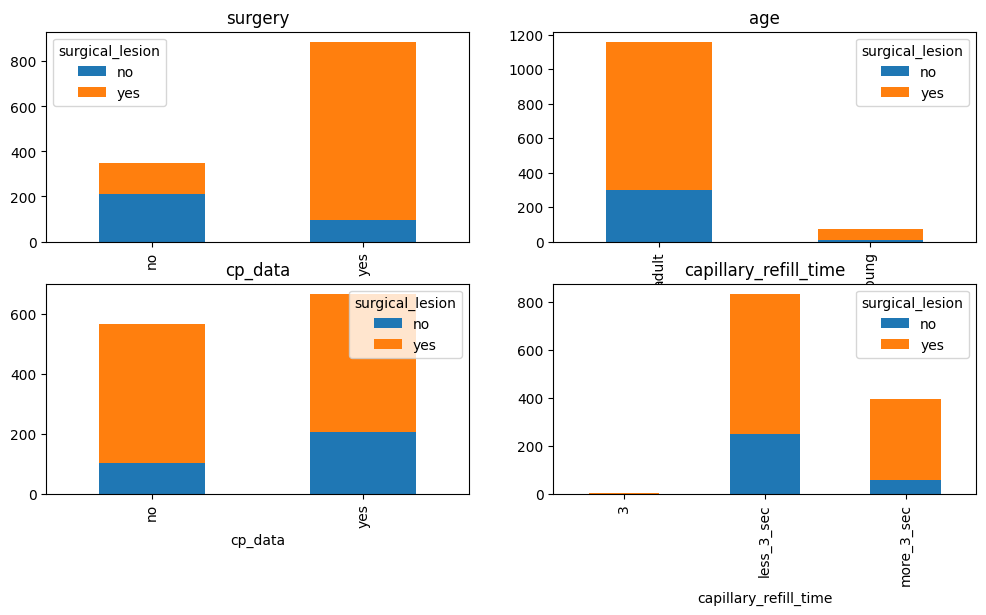

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
axs = axs.reshape(-1)
for i, name in enumerate(binary):
    # sns.countplot(x=name, ax=axs[i], data=df, hue='surgical_lesion')
    counts = df.groupby([name, 'surgical_lesion']).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(name)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

### Atrybuty kategoryczne

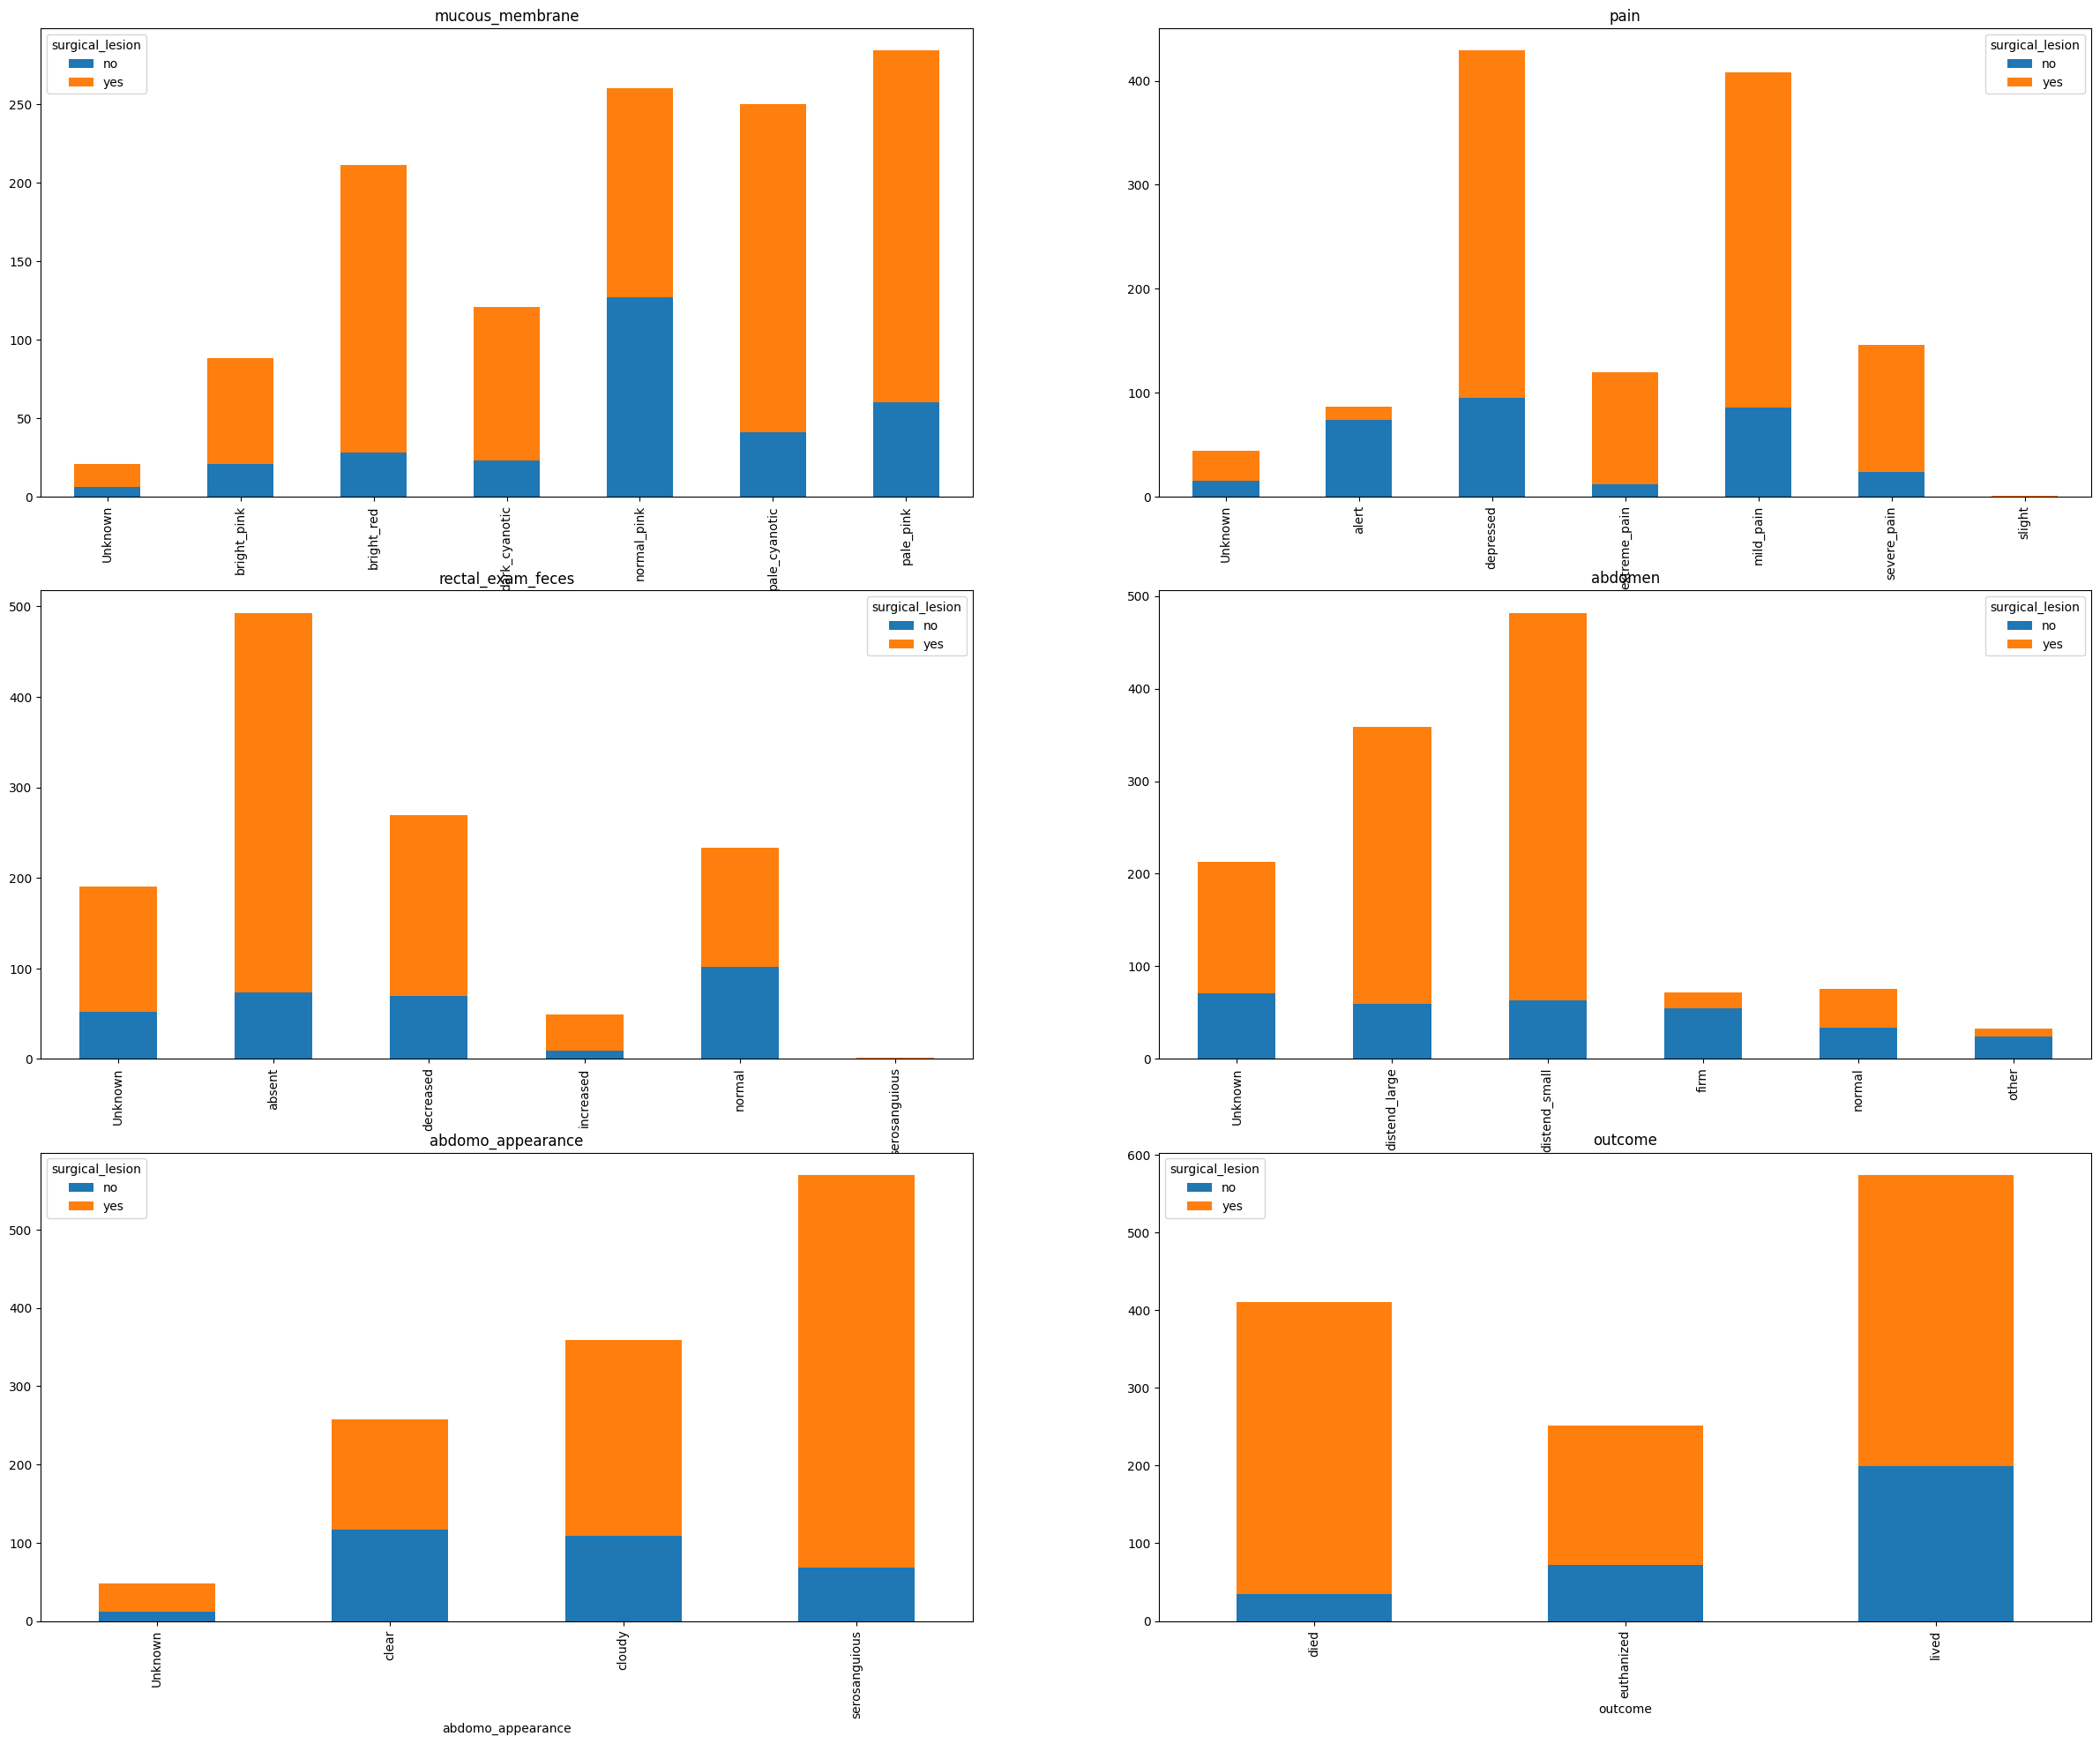

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(30, 40))
axs = axs.reshape(-1)
for i, name in enumerate(categorical):
    # sns.countplot(x=name, ax=axs[i], data=df, hue='surgical_lesion')
    counts = df.groupby([name, 'surgical_lesion']).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(name)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

### Atrybuty numeryczne

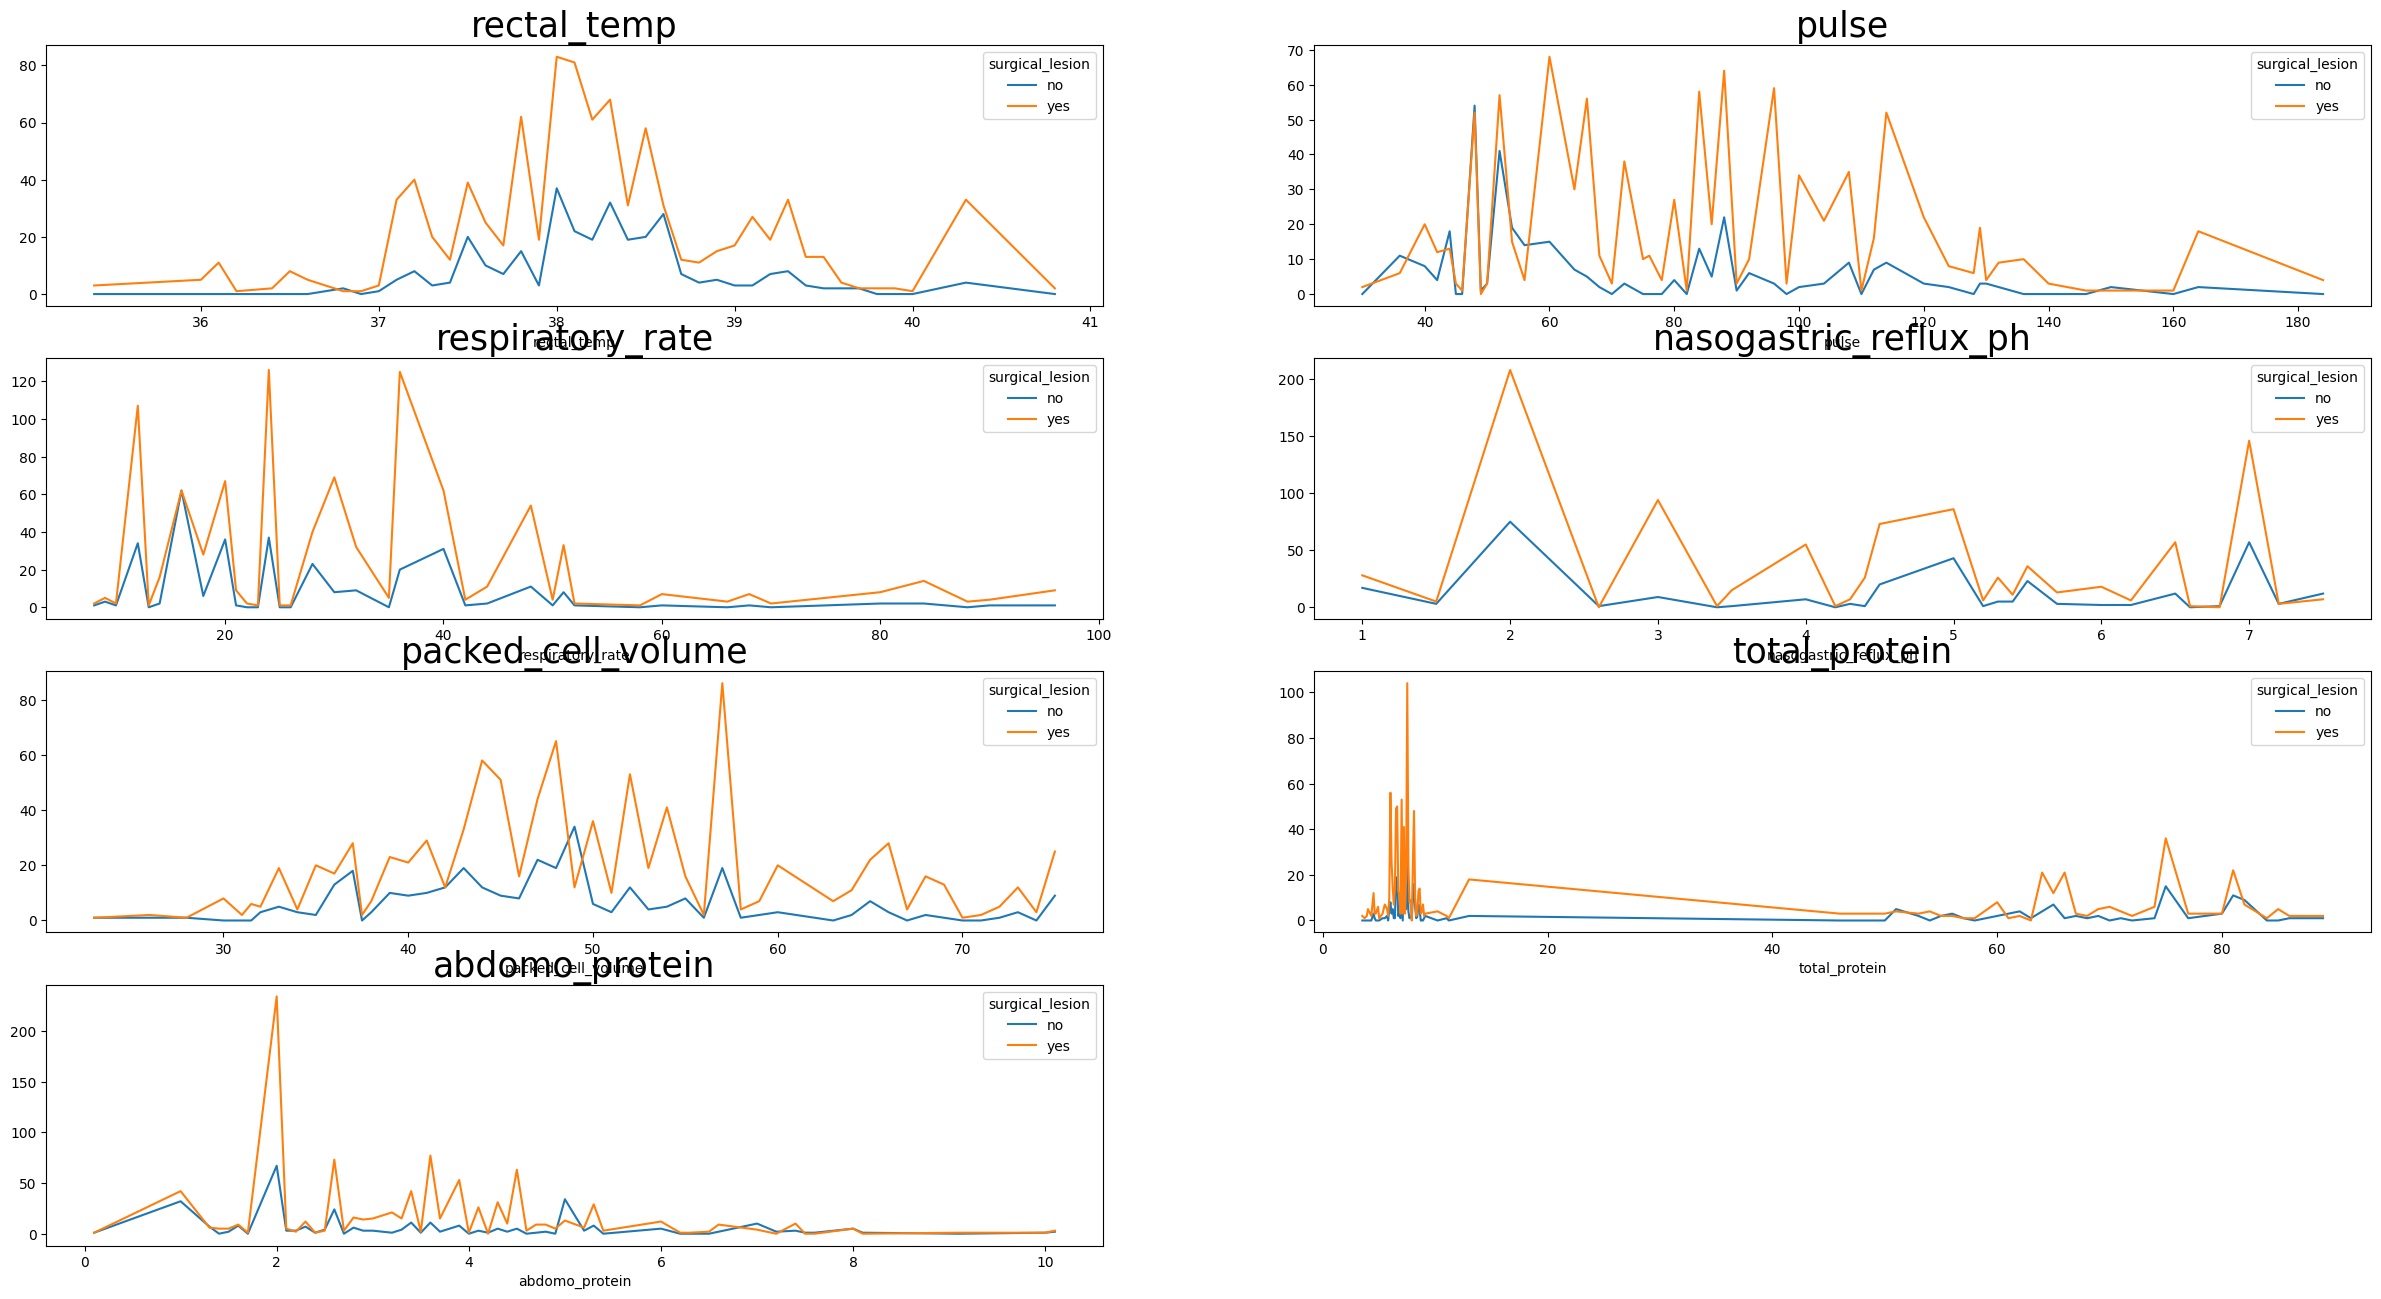

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=10, figsize=(30, 40))
axs = axs.reshape(-1)
for i, name in enumerate(numerical):
    counts = df.groupby([name, 'surgical_lesion']).size().unstack(fill_value=0)
    counts.plot(kind='line', stacked=False, ax=axs[i])
    axs[i].set_title(name, fontsize=25)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

Text(0, 0.5, 'Liczba koni o tej liczności wystapień')

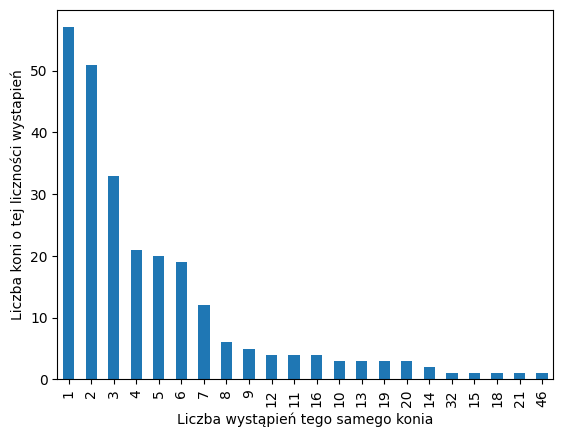

In [27]:
twice = df.hospital_number.value_counts().value_counts().T
ax = twice.plot(kind='bar')

ax.set_xlabel('Liczba wystąpień tego samego konia')
ax.set_ylabel('Liczba koni o tej liczności wystapień')

Atrybut 'hospital_number' pozwala nam zidentyfikować ponowne wystąpienia tego samego konia. Zbiór nie zawiera żadnych sygnatur czasowych, a zatem nie jestem w stanie ułożyć danych chronologicznie i wykorzystywać dodatkowych historycznych danych do diagnozy (klasyfikacji). Nie chcę by klasyfikator uczył się na pamięć ID chorych koni, tylko ich obiawów, dlatego usunę ten atrybut.

<Axes: xlabel='surgical_lesion', ylabel='outcome'>

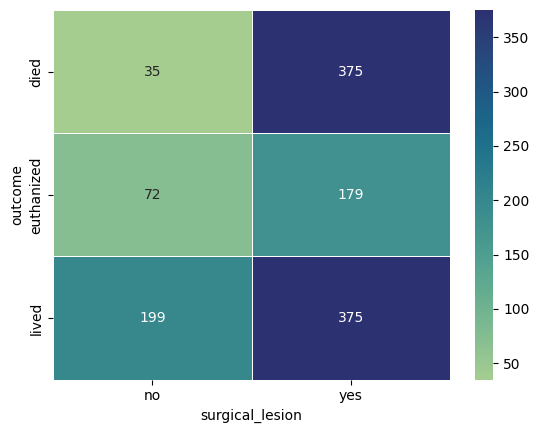

In [28]:
outcome = df.groupby(['outcome', 'surgical_lesion']).size().unstack()
sns.heatmap(outcome, annot=True, fmt='g', cmap='crest', linewidths=.5)

Choć 'outcome' może dawać dużo informacji to z punktu widzenia użyteczności klasyfikatora jest niepraktyczne. Idealnie byłoby wykorzystywać klasyfikator przed śmiercią konią, dlatego z tego atrybutu również nie będę korzystać. Analogicznie niepraktyczny jest atrybut 'surgery', który jest pochodną klasy decyzyjnej.

Wedle opisu danych 'cp_data' powinno być nieistotne, jednak brak szegółów dotyczących patogenu nie oznacza, że sama informacja o wystąpieniu patogenu nie będzie bez znaczenia.

W atrybucie capillary_refill_time uwzględniona jest wartość "dokłanie 3" [sekundy] i pojawia sie ona w bardzo małej liczbie przypadków, więc postanowiłem zamenić "3" i "more_3_sec" na "noless_3_sec".


In [50]:
df.drop(columns=['hospital_number', 'outcome', 'surgery'], inplace=True)

df['capillary_refill_time'] = df['capillary_refill_time'].replace(['3', 'more_3_sec'], 'noless_3_sec')

Atrybuty binarne i klasę decyzyjną mapuję na 0/1.

In [33]:
# for b_col in binary:
#     if b_col not in obsolete:
#         df[b_col] = df[b_col].map({'no': 0, 'yes': 1, 'young': 0, 'adult': 1, 'less_3_sec': 0, 'noless_3_sec':1})
# df.surgical_lesion = df.surgical_lesion.map({'no': 0, 'yes': 1})

In [ ]:
# for i, out_col in [(i, f'label{i}') for i in range(12)]:
#     df.drop(columns=out_col)   
#     for l_col in ['lesion_1', 'lesion_2', 'lesion_3']:
#         df[out_col] += df[l_col]//1000 == np.int64(i)
#         if i == 0: break

# df['outcome'].replace('euthanized', 'died', inplace=True)


# Klasyfikacja

In [ ]:
# C5.0 (Quinlan 1993; Kuhn and Johnson 2013)
# Naive Bayes
# XGBoost

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

np.random.seed(0)


In [62]:
X = df.drop(columns='surgical_lesion')
y = df.surgical_lesion

In [63]:
binary = ['age', 'capillary_refill_time', 'cp_data', ]
numerical = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
rankable = ['temp_of_extremities', 'peripheral_pulse', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux']
categorical = ['mucous_membrane', 'pain', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance']

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median", add_indicator=True)), 
        ("scaler", StandardScaler())]
)

binary_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("encoder", OneHotEncoder(handle_unknown="error"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical),
        ("bin", binary_transformer, binary),
        ("cat", categorical_transformer, categorical + rankable),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.833


# Spis
X narzedzia
opis zbioru danych
analiza + przetworzenie
    nominal i binar
        wykresy danych
    ilościowe
    obsł brakujących
    co zrobiłem z lesion
    co usuwam
    2D
zależności
    korelacja - sns.heatmap(corr, mask=np.triu(np.ones_like(corr)), annot=True, cmap='RdBu', vmin=-1, vmax=1)
rozkłady z podziałem na klasę
pdpdb warunkowe ??

Klasyfikacja
1 2 3
porównanie

------


